In [60]:
#This notebook will generate 3 different plots, each with 2 subplots. We can keep evolving it till
#everything is ready for the DR and paper, just input the file names and change the plot labels
#it should work fine with DMcalc output format, wideband will be worked on soon


#for this script you need separate files for band3 and band3+5 DMs for ease of use, we can try to 
#extract it from the from the common file for the final version if needed
#to separate the data use the following commands in your terminal, change the file names as needed
#awk '/band3\+5/{print}' J1600-3053_DM_timeseries.txt > j1600-withoutFD-DM-timeseries-band3.txt
#awk '/band3$/{print}' J1600-3053_DM_timeseries.txt > j1600-withoutFD-DM-timeseries-band3+5.txt


import matplotlib.pyplot as plt
import numpy as np

a,b,c = np.loadtxt("j1600-withoutFD-DM-timeseries-band3.txt", usecols=[0,1,2], delimiter=' ', unpack=True)

e,f,g = np.loadtxt("j1600-withoutFD-DM-timeseries-band3+5.txt", usecols=[0,1,2], delimiter=' ', unpack=True )

h,i,j = np.loadtxt("j1600-withFD-DM-timeseries-band3.txt", usecols=[0,1,2], delimiter=' ', unpack=True)

k,l,m = np.loadtxt("j1600-withFD-DM-timeseries-band3+5.txt", usecols=[0,1,2], delimiter=' ', unpack=True )

#The following was used for the proposal for cycle 42 when all 3 types of DMs (band3, band3+5 and wideband)
#were in the same plot, we can change this in the final form
#h,i,j = np.loadtxt("widebanddms.txt", usecols=[0,1,2], delimiter=' ', unpack=True )

y_error = c
y_error1 = g
y_error2 = j
y_error3 = m

y_error4 = (np.sqrt((c**2)+(((1.2533 * np.std(c))/np.sqrt(len(c)))**2)))
y_error5 = (np.sqrt((g**2)+(((1.2533 * np.std(g))/np.sqrt(len(g)))**2)))
y_error6 = (np.sqrt((j**2)+(((1.2533 * np.std(c))/np.sqrt(len(j)))**2)))
y_error7 = (np.sqrt((m**2)+(((1.2533 * np.std(m))/np.sqrt(len(m)))**2)))

medianb = b - np.median(b)
medianf = f - np.median(f)
mediani = i - np.median(i)
medianl = l - np.median(l)

#prerna's comments on error propogation:
#"Answering to Neel's question in today's sync-up:
#For median subtracted DM, we need to do error propagation.
#If ∆x is error of DM and ∆y is error of median DM, then error of median subracted DM is √(∆x^2 + ∆y^2).
#Now to do this, we need error of median DM, ∆y.
#To find ∆y, I assumed Gaussian distribution of DMs and in that case formula is:
#∆y=1.2533×(standard deviation)/√N
#where N is the number of DM points you use to find median."


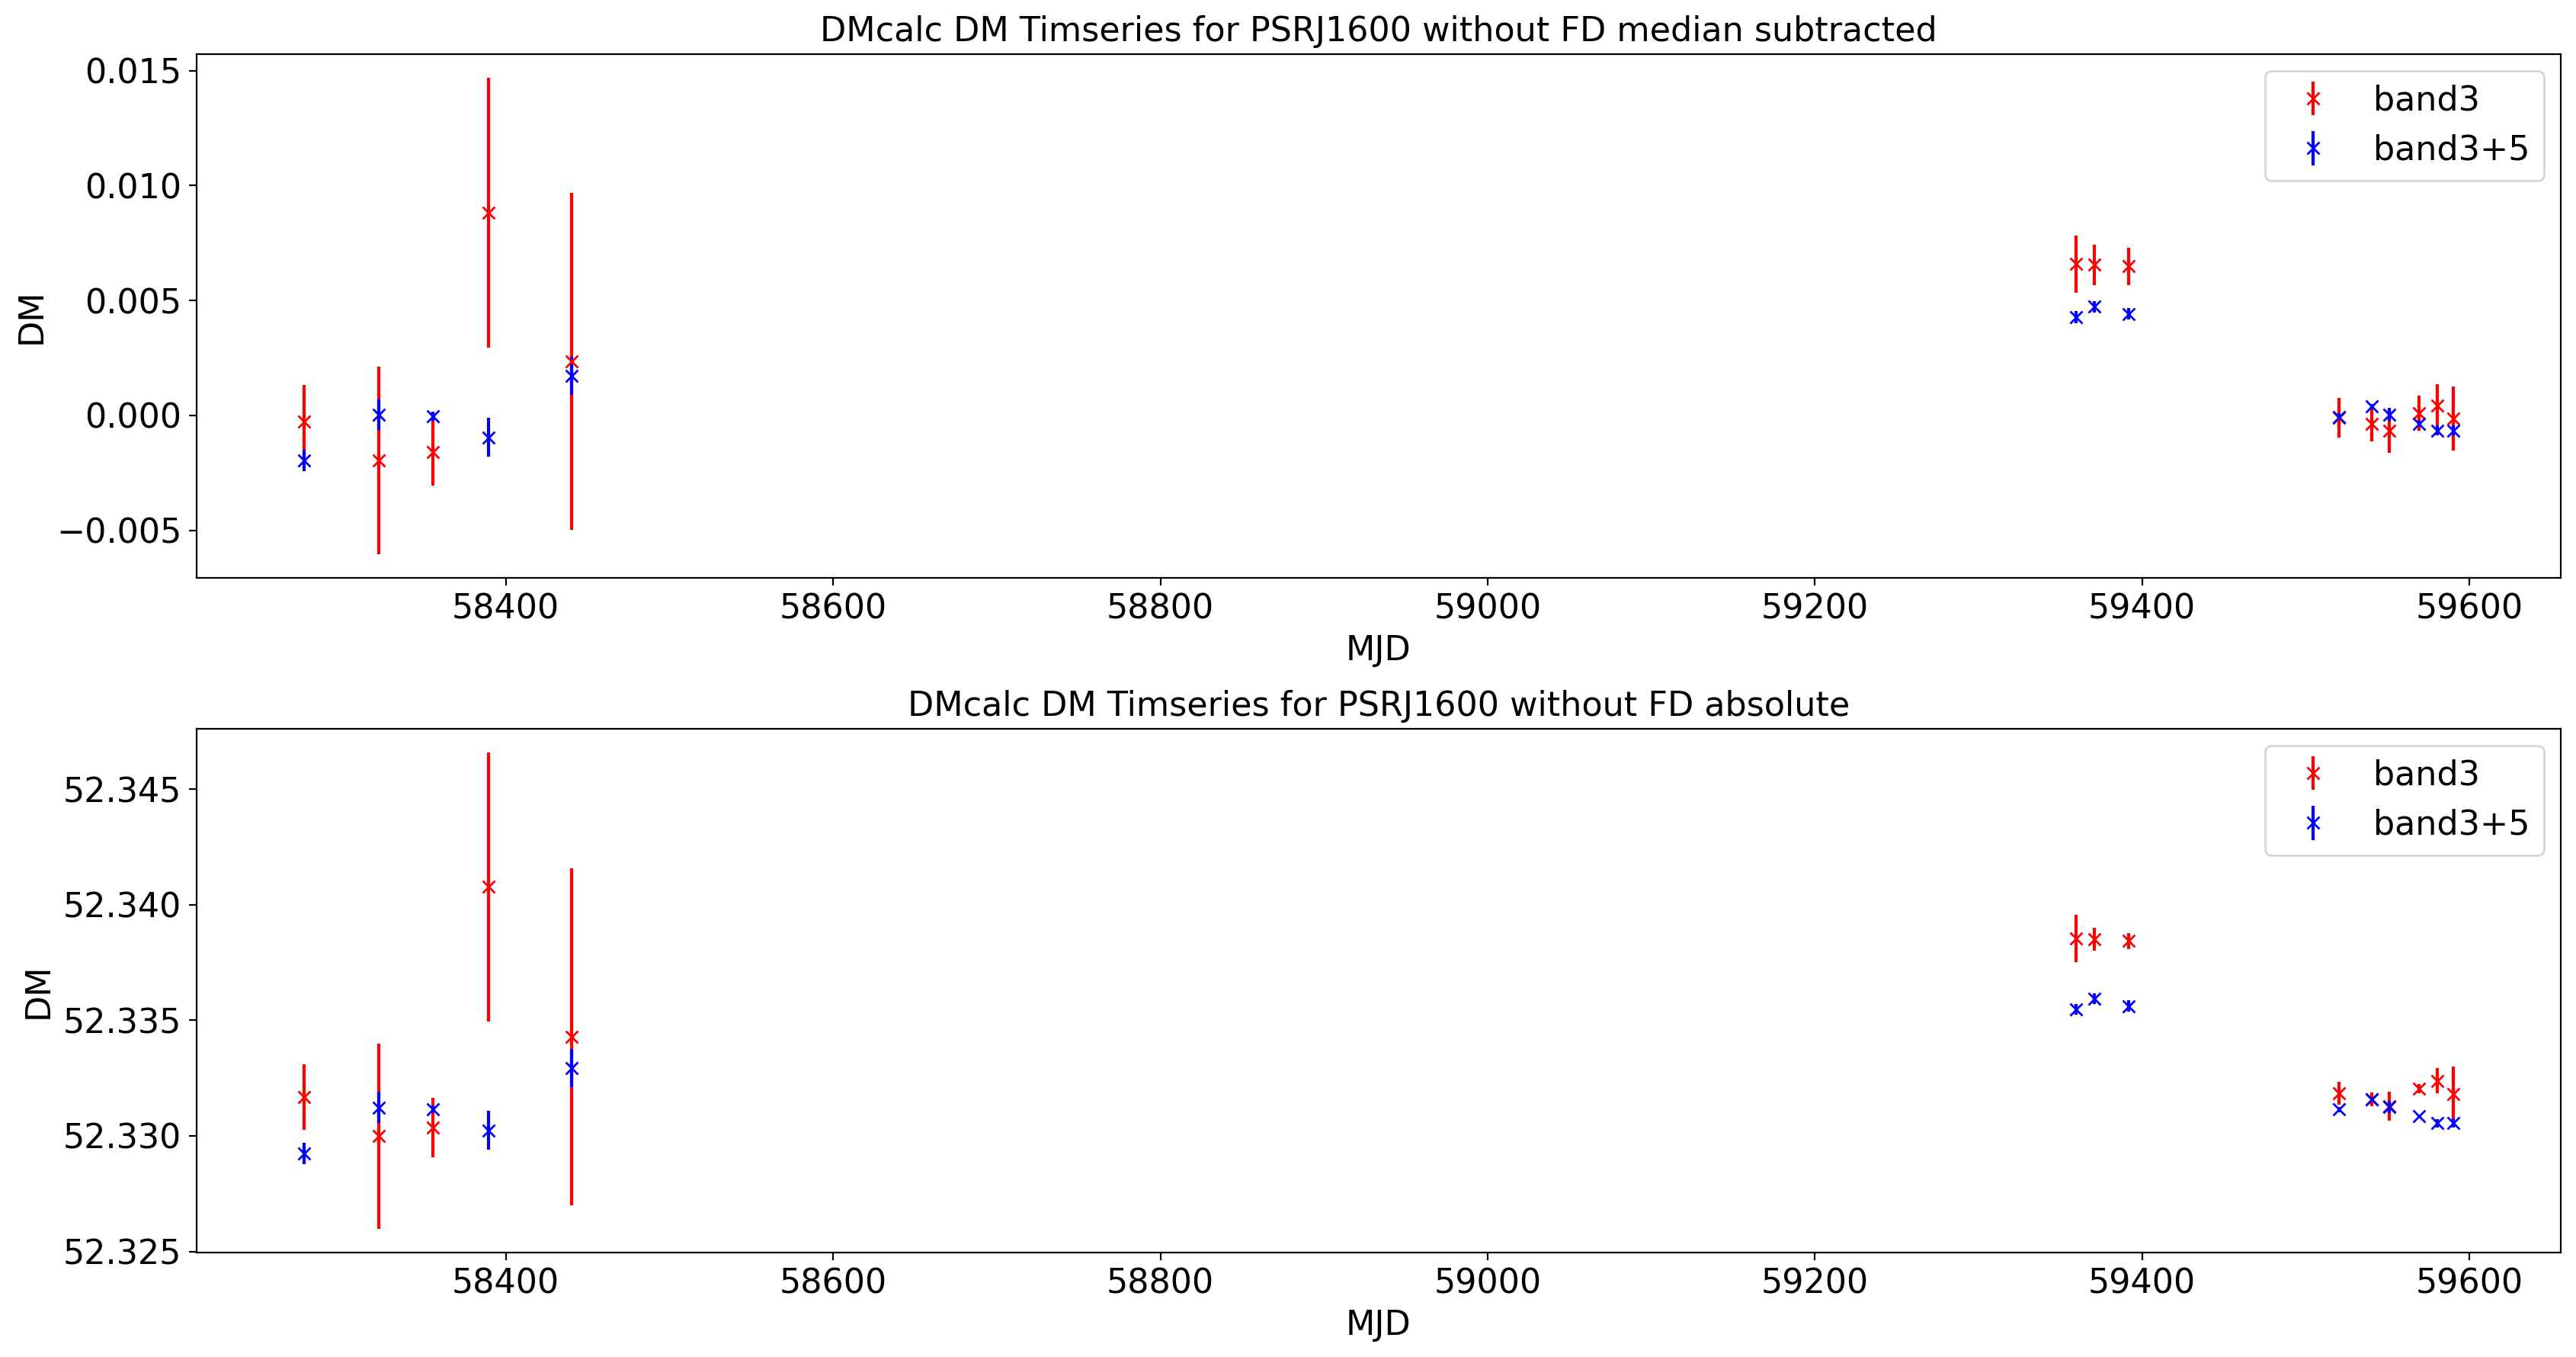

In [61]:
#withoutFD
plt.rcParams['figure.figsize'] = [17, 9]
plt.subplot(2,1,1)
plt.errorbar(a, medianb , yerr = y_error4,fmt='x', ecolor = 'red', color ='red', label = 'band3')
plt.errorbar(e, medianf , yerr = y_error5,fmt='x', ecolor = 'blue', color = 'blue', label = 'band3+5')
plt.ylabel('DM', fontsize=16)
plt.xlabel('MJD', fontsize=16)
plt.title('DMcalc DM Timseries for PSRJ1600 without FD median subtracted', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.rcParams['figure.dpi'] = 200
plt.subplot(2,1,2)
plt.errorbar(a, b , yerr = y_error,fmt='x', ecolor = 'red', color ='red', label = 'band3')
plt.errorbar(e, f , yerr = y_error1,fmt='x', ecolor = 'blue', color = 'blue', label = 'band3+5')
plt.ylabel('DM', fontsize=16)
plt.xlabel('MJD', fontsize=16)
plt.title('DMcalc DM Timseries for PSRJ1600 without FD absolute', fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()


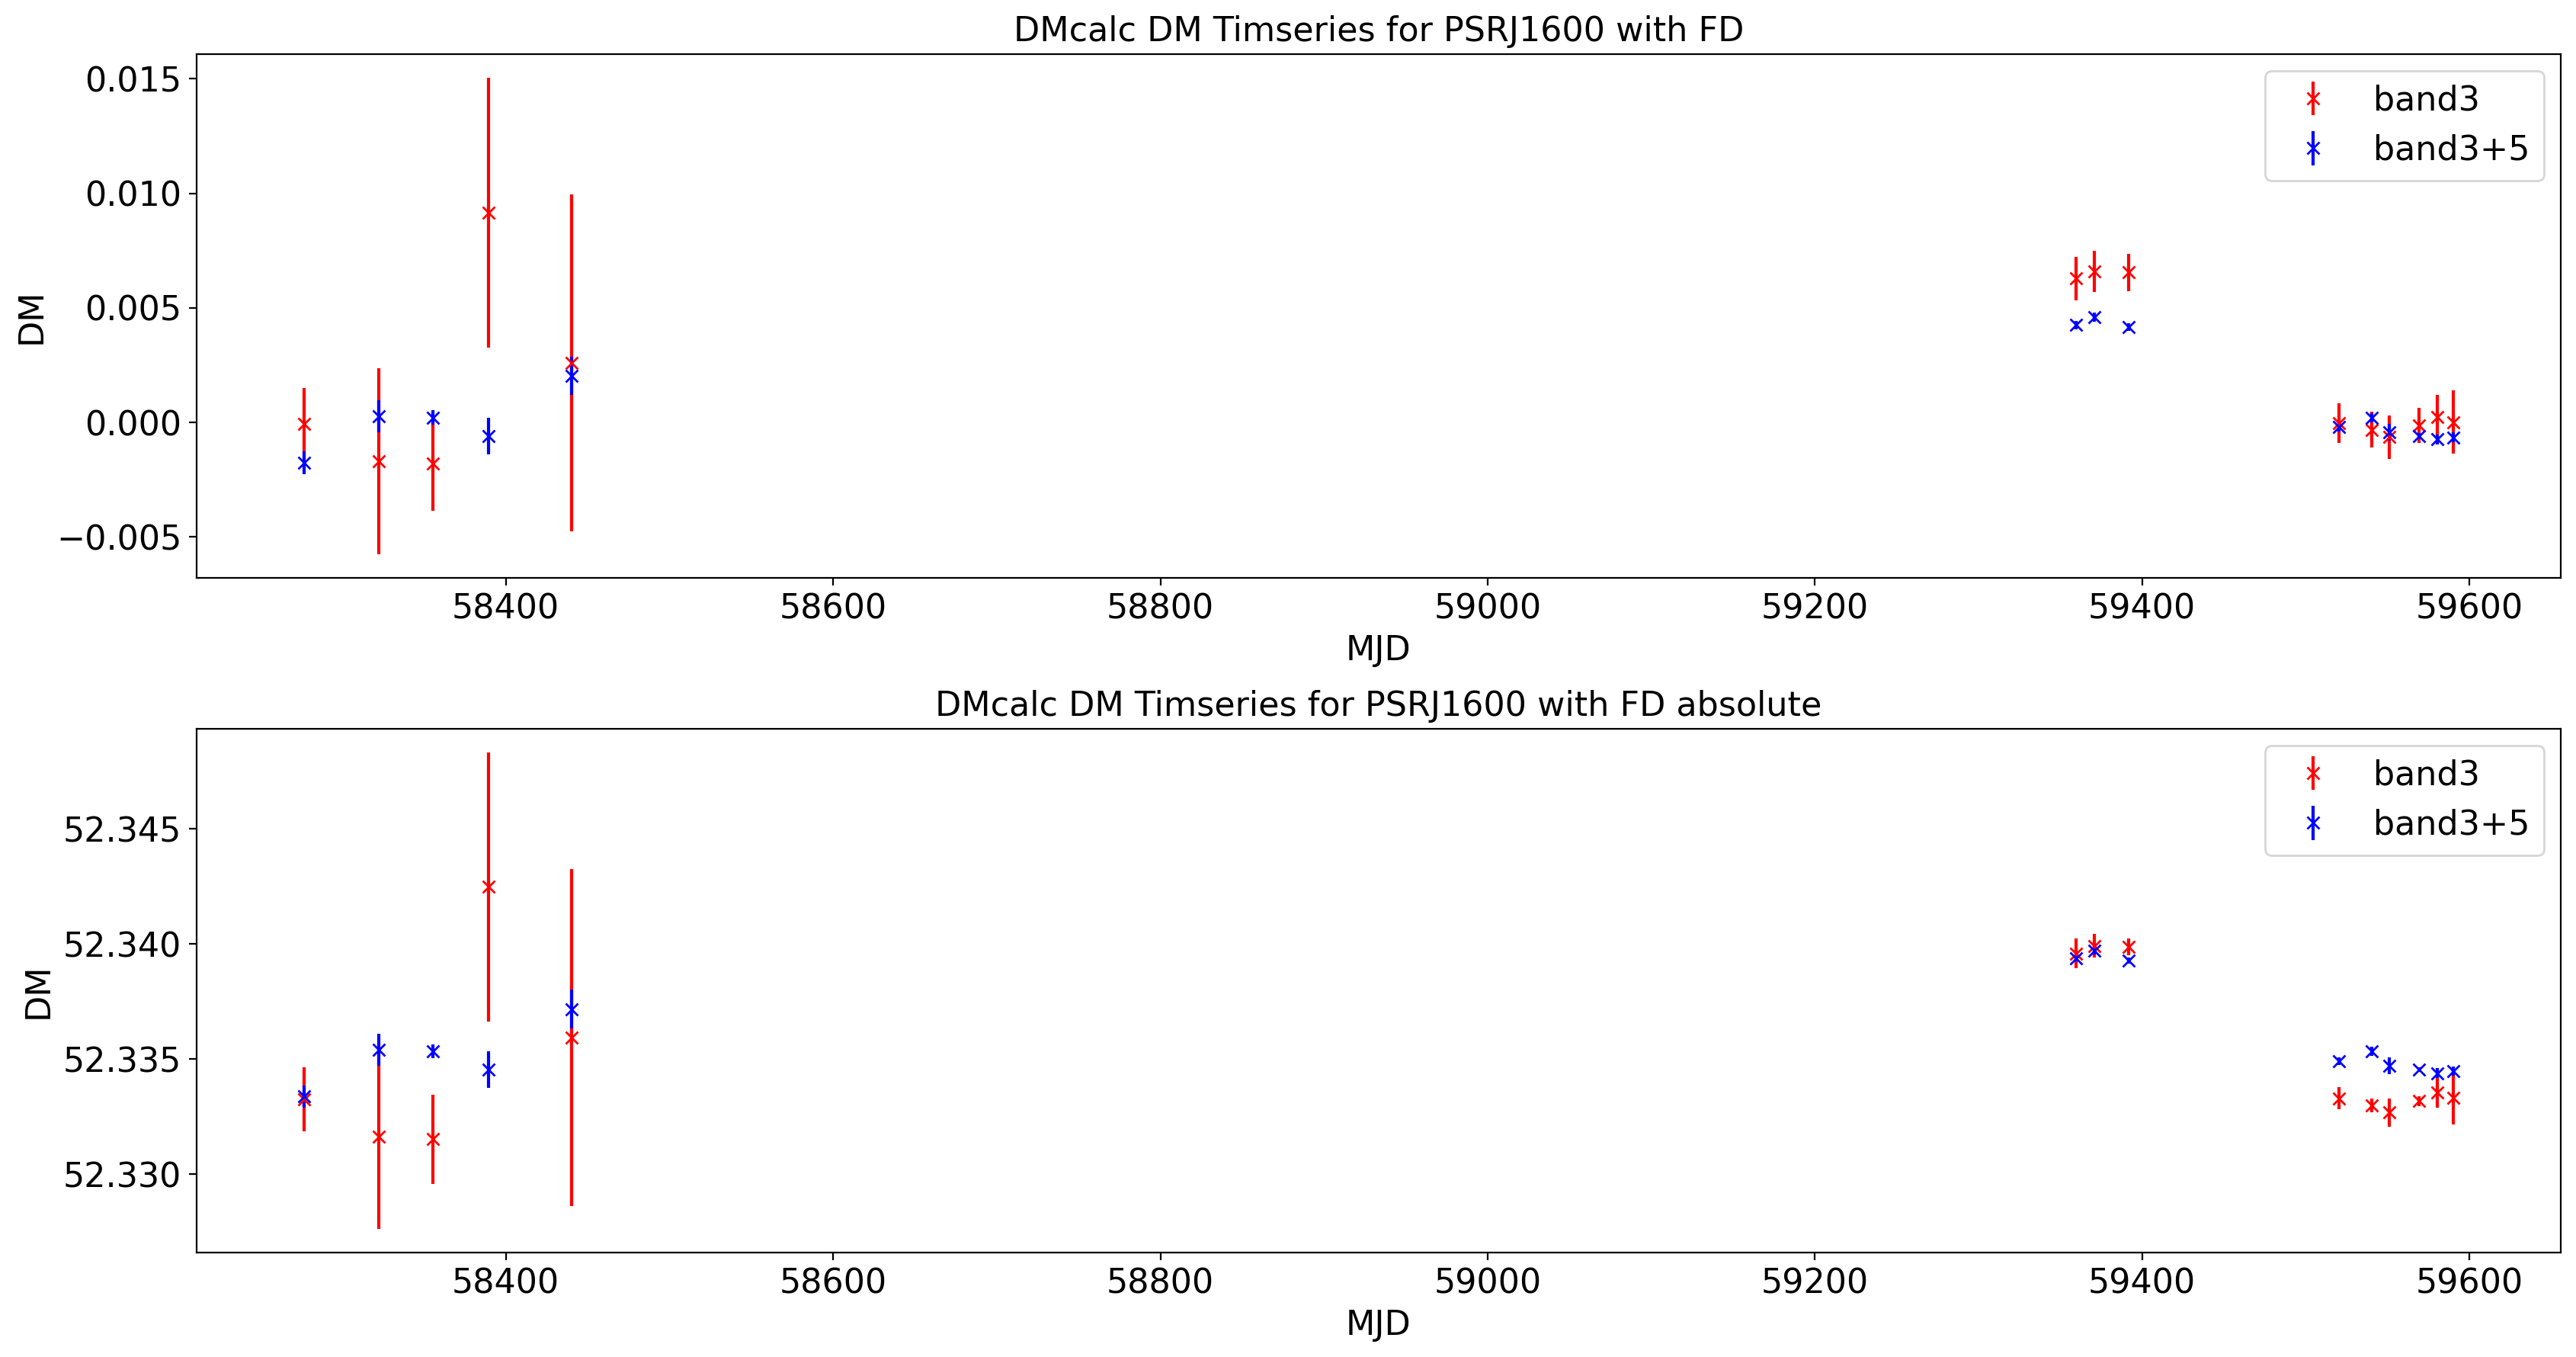

In [58]:
#withFD

plt.rcParams['figure.figsize'] = [17, 9]
plt.subplot(2,1,1)
plt.errorbar(h, mediani , yerr = y_error6,fmt='x', ecolor = 'red', color ='red', label = 'band3')
plt.errorbar(k, medianl , yerr = y_error7,fmt='x', ecolor = 'blue', color = 'blue', label = 'band3+5')
plt.ylabel('DM', fontsize=16)
plt.xlabel('MJD', fontsize=16)
plt.title('DMcalc DM Timseries for PSRJ1600 with FD median subtracted', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.rcParams['figure.dpi'] = 200
plt.subplot(2,1,2)
plt.errorbar(h, i , yerr = y_error2,fmt='x', ecolor = 'red', color ='red', label = 'band3')
plt.errorbar(k, l , yerr = y_error3,fmt='x', ecolor = 'blue', color = 'blue', label = 'band3+5')
plt.ylabel('DM', fontsize=16)
plt.xlabel('MJD', fontsize=16)
plt.title('DMcalc DM Timseries for PSRJ1600 with FD absolute', fontsize=16)
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()

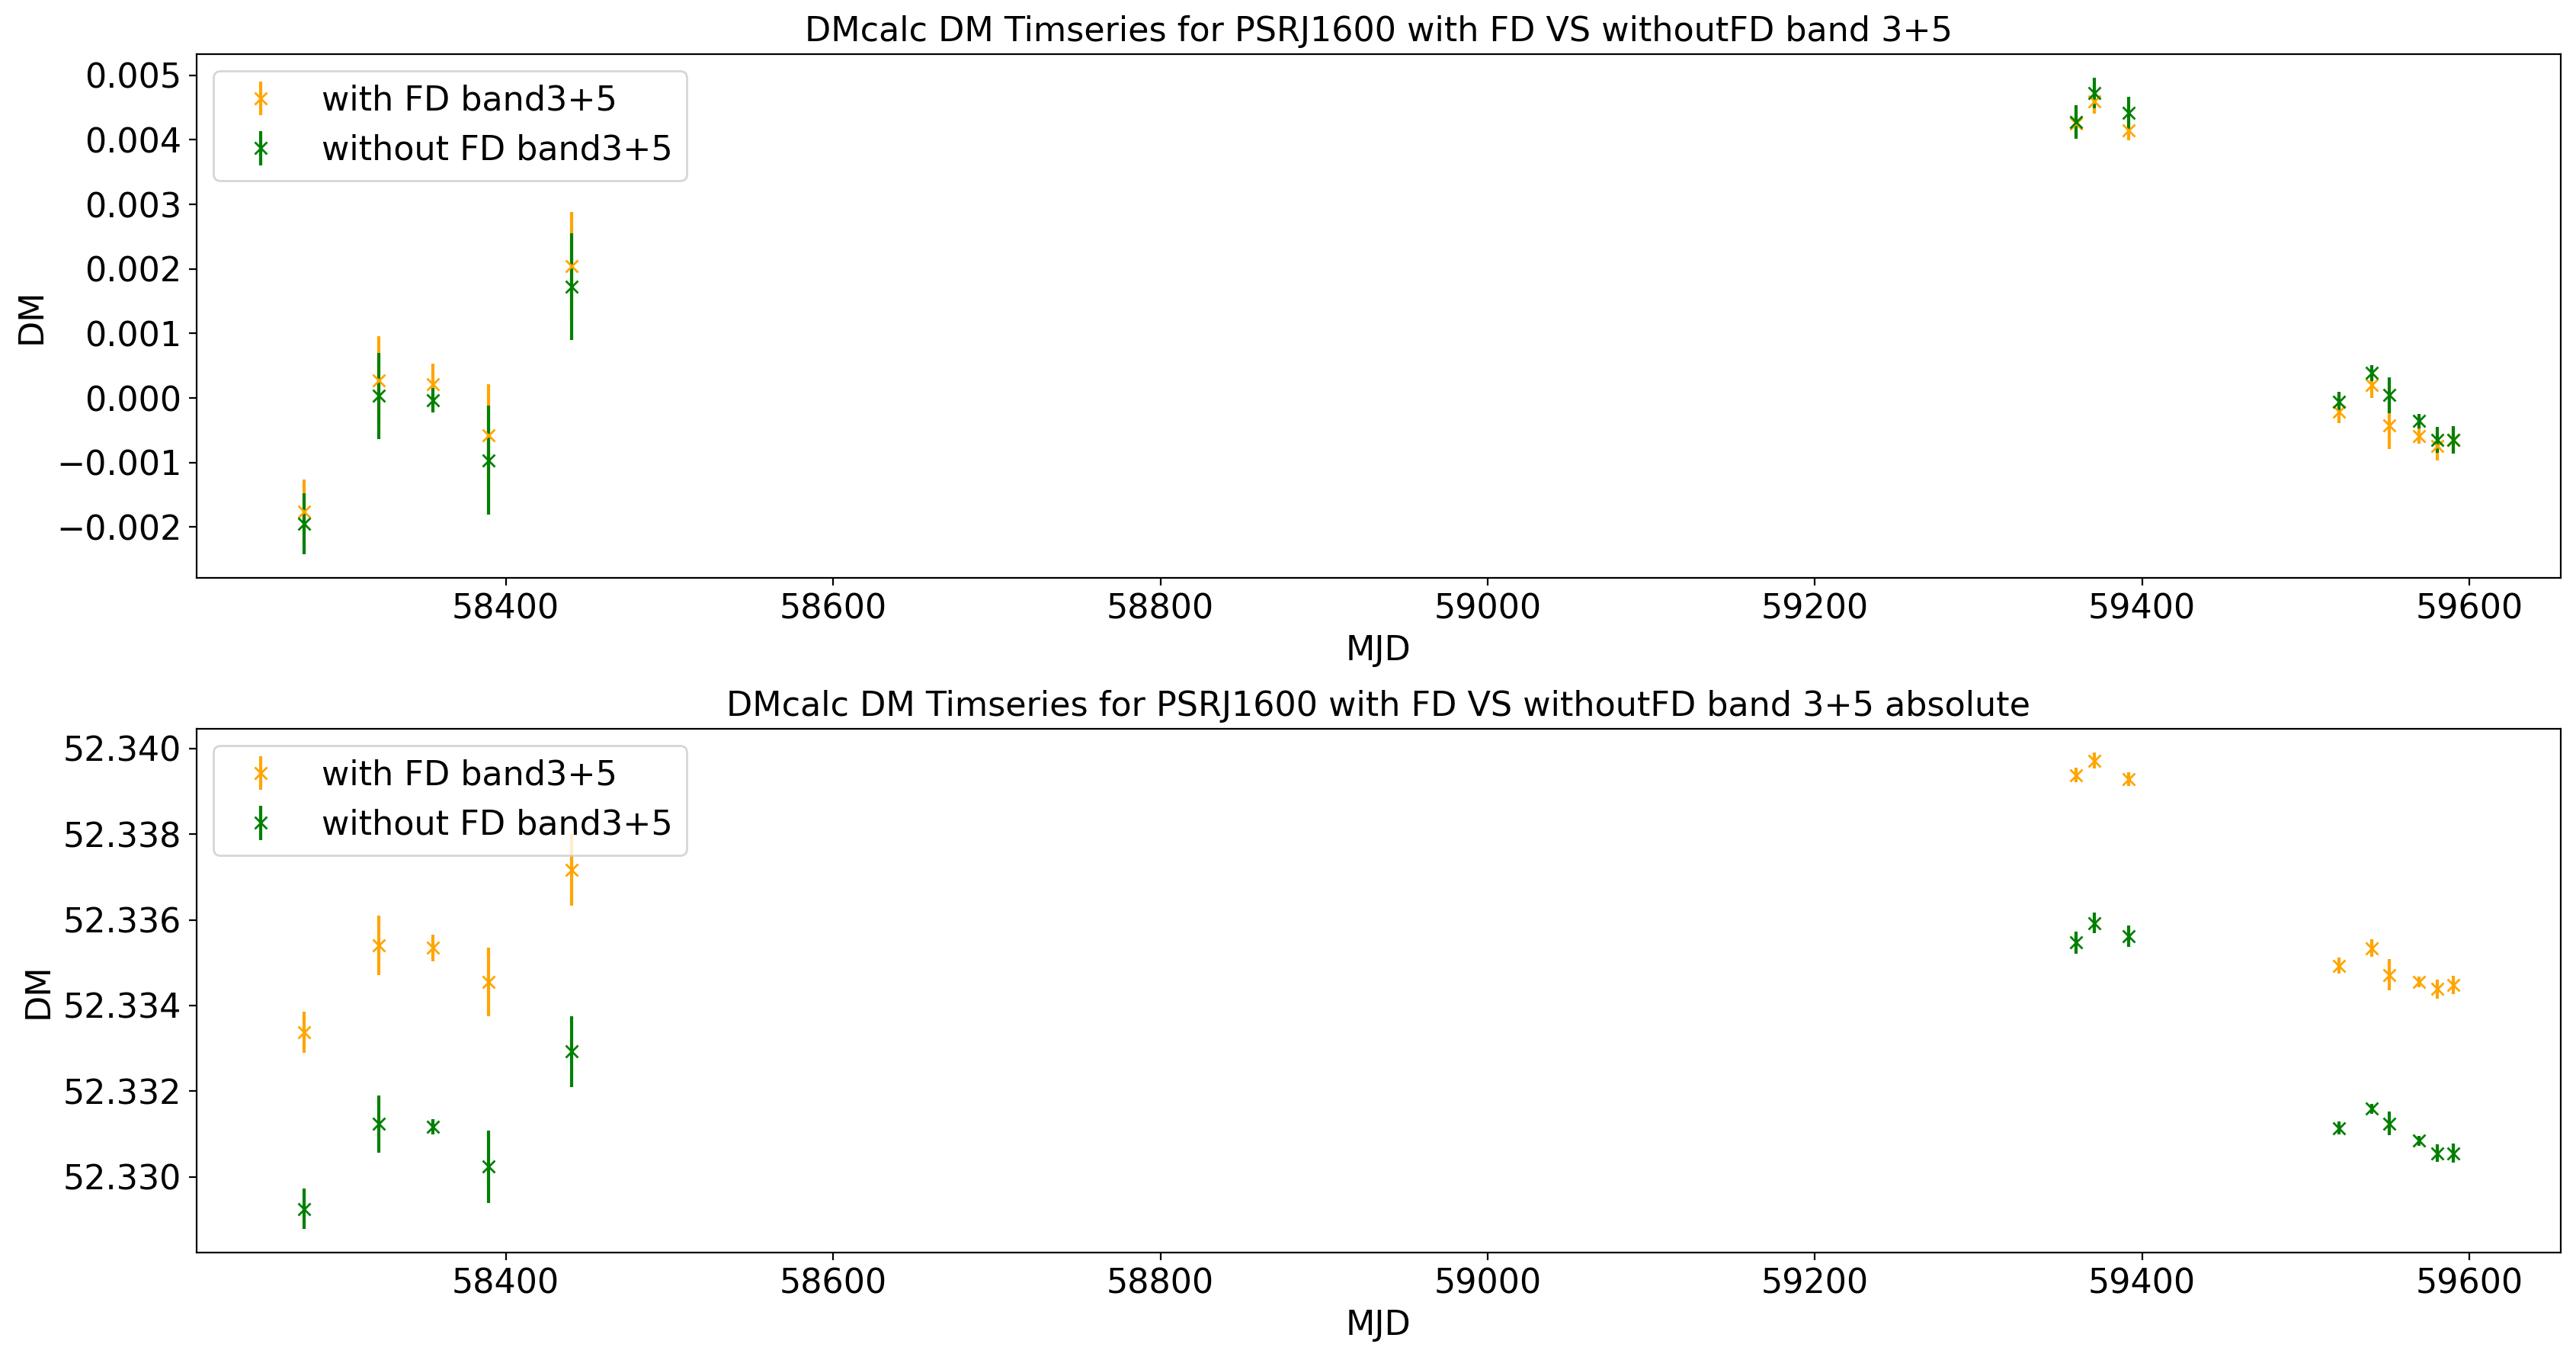

In [59]:

#withFD vs withoutFD
plt.rcParams['figure.figsize'] = [17, 9]
plt.subplot(2,1,1)
plt.errorbar(k, medianl , yerr = y_error7,fmt='x', ecolor = 'orange', color = 'orange', label = 'with FD band3+5')
plt.errorbar(e, medianf , yerr = y_error5,fmt='x', ecolor = 'green', color = 'green', label = 'without FD band3+5')
plt.ylabel('DM', fontsize=16)
plt.xlabel('MJD', fontsize=16)
plt.title('DMcalc DM Timseries for PSRJ1600 with FD VS withoutFD band 3+5 median subtracted', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.rcParams['figure.dpi'] = 200
plt.subplot(2,1,2)
plt.errorbar(k, l , yerr = y_error7,fmt='x', ecolor = 'orange', color = 'orange', label = 'with FD band3+5')
plt.errorbar(e, f , yerr = y_error5,fmt='x', ecolor = 'green', color = 'green', label = 'without FD band3+5')
plt.ylabel('DM', fontsize=16)
plt.xlabel('MJD', fontsize=16)
plt.title('DMcalc DM Timseries for PSRJ1600 with FD VS withoutFD band 3+5 absolute', fontsize=16)
plt.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
